In [1]:
import sys; sys.path.append('../util')
from load_yelp_data import load_yelp_dataframe, restaurants_and_bars_in, train_test_split_reviews
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics
import scipy.optimize
%matplotlib inline

from baseline_calculator import *

In [2]:
businesses = load_yelp_dataframe('businesses')
reviews = load_yelp_dataframe('reviews')
users = load_yelp_dataframe('users')
phoenix_restaurants, phoenix_reviews, phoenix_users = restaurants_and_bars_in('Phoenix', businesses, reviews, users)
reviews_train, reviews_test = train_test_split_reviews(phoenix_reviews)

In [3]:
bc = L2RegLeastSquaresBaselineCalculator()
lambdas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]
train_rmses = []
test_rmses = []
for lamb in lambdas:
    bc.fit(reviews_train, l2_penalty=lamb)
    train_rmses.append(bc.baseline_rmse(reviews_train))
    test_rmses.append(bc.baseline_rmse(reviews_test))

loss at iter 0: 828243.574404
loss at iter 25: 782477.394191
loss at iter 50: 706816.258588
loss at iter 75: 631699.187843
loss at iter 100: 542340.331922
loss at iter 125: 485993.305199
loss at iter 150: 473407.223579
loss at iter 175: 465630.87191
loss at iter 0: 828243.574404
loss at iter 25: 782477.456982
loss at iter 50: 706817.040721
loss at iter 75: 631703.018553
loss at iter 100: 542356.979319
loss at iter 125: 483853.573884
loss at iter 0: 828243.574404
loss at iter 25: 782478.084886
loss at iter 50: 706824.861597
loss at iter 75: 631741.317574
loss at iter 100: 542523.333776
loss at iter 125: 491193.488612
loss at iter 0: 828243.574404
loss at iter 25: 782484.363265
loss at iter 50: 706903.02436
loss at iter 75: 632123.500528
loss at iter 100: 544174.985589
loss at iter 125: 489943.477912
loss at iter 150: 476209.254523
loss at iter 175: 468371.104896
loss at iter 0: 828243.574404
loss at iter 25: 782547.080724
loss at iter 50: 707680.074631
loss at iter 75: 635866.004673
los

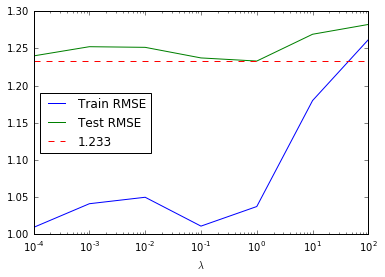

In [12]:
plt.semilogx(lambdas, train_rmses, label='Train RMSE')
plt.semilogx(lambdas, test_rmses, label='Test RMSE')
plt.axhline(min(test_rmses), label='{:.3f}'.format(min(test_rmses)), color='red', ls='--')
plt.legend(loc='best')
plt.xlabel(r'$\lambda$')
plt.show()

In [10]:
lambdas2 = [0.25, 0.325, 0.5, 0.625, 0.75]
train_rmses2 = []
test_rmses2 = []
for lamb in lambdas2:
    bc.fit(reviews_train, l2_penalty=lamb)
    train_rmses2.append(bc.baseline_rmse(reviews_train))
    test_rmses2.append(bc.baseline_rmse(reviews_test))

loss at iter 0: 828243.574404
loss at iter 25: 782494.824549
loss at iter 50: 707033.110031
loss at iter 75: 632757.224732
loss at iter 100: 546880.401626
loss at iter 125: 506057.615955
loss at iter 0: 828243.574404
loss at iter 25: 782500.053934
loss at iter 50: 707098.065996
loss at iter 75: 633072.573036
loss at iter 100: 548211.336579
loss at iter 125: 504046.683376
loss at iter 0: 828243.574404
loss at iter 25: 782512.252575
loss at iter 50: 707249.405119
loss at iter 75: 633804.488581
loss at iter 100: 551261.740162
loss at iter 125: 505989.412875
loss at iter 0: 828243.574404
loss at iter 25: 782520.963099
loss at iter 50: 707357.312154
loss at iter 75: 634323.966906
loss at iter 100: 553394.40881
loss at iter 125: 509322.203539
loss at iter 0: 828243.574404
loss at iter 25: 782529.671298
loss at iter 50: 707465.059229
loss at iter 75: 634840.700384
loss at iter 100: 555489.549921
loss at iter 125: 538852.525025


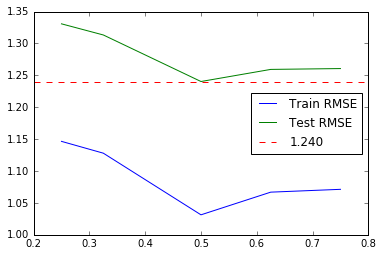

In [11]:
plt.plot(lambdas2, train_rmses2, label='Train RMSE')
plt.plot(lambdas2, test_rmses2, label='Test RMSE')
plt.axhline(min(test_rmses2), label='{:.3f}'.format(min(test_rmses2)), color='red', ls='--')
plt.legend(loc='best')
plt.show()

In [15]:
bc = L2RegLeastSquaresBaselineCalculator()
lambdas = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 1000]
train_rmses = []
test_rmses = []
for lamb in lambdas:
    bc.fit(reviews_train, l2_penalty=lamb, tol=5)
    train_rmses.append(bc.baseline_rmse(reviews_train))
    test_rmses.append(bc.baseline_rmse(reviews_test))

loss at iter 0: 828243.574404
loss at iter 25: 782477.456982
loss at iter 50: 706817.040721
loss at iter 75: 631703.018553
loss at iter 100: 542356.979319
loss at iter 125: 483853.573884
loss at iter 0: 828243.574404
loss at iter 25: 782478.084886
loss at iter 50: 706824.861597
loss at iter 75: 631741.317574
loss at iter 100: 542523.333776
loss at iter 125: 491193.488612
loss at iter 150: 474897.966211
loss at iter 175: 466309.102576
loss at iter 200: 457949.181732
loss at iter 225: 450858.398233
loss at iter 250: 444779.242365
loss at iter 0: 828243.574404
loss at iter 25: 782480.875426
loss at iter 50: 706859.610924
loss at iter 75: 631911.35771
loss at iter 100: 543260.062803
loss at iter 125: 487552.655969
loss at iter 150: 478545.272164
loss at iter 175: 466639.092644
loss at iter 200: 460169.460474
loss at iter 225: 454205.755814
loss at iter 250: 446965.270238
loss at iter 275: 441529.401499
loss at iter 300: 437612.505548
loss at iter 325: 431994.299839
loss at iter 350: 428437

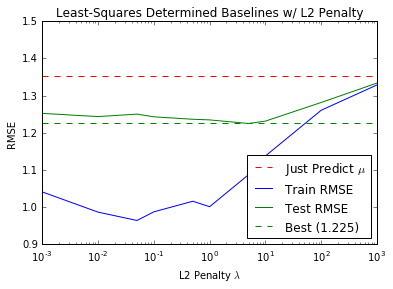

In [29]:
plt.ylabel('RMSE')
plt.title('Least-Squares Determined Baselines w/ L2 Penalty')
plt.axhline(1.353924, label=r'Just Predict $\mu$', color='red', ls='--')
plt.semilogx(lambdas, train_rmses, label='Train RMSE')
plt.semilogx(lambdas, test_rmses, label='Test RMSE')
plt.axhline(min(test_rmses), label='Best ({:.3f})'.format(min(test_rmses)), color='green', ls='--')

plt.legend(loc='lower right')
plt.xlabel(r'L2 Penalty $\lambda$')
plt.ylim(0.9, 1.5)
plt.show()